In [196]:
import re
from textblob import TextBlob
import re
import pandas as pd
import matplotlib.pyplot as plt

import joblib

 Dataset from <https://www.kaggle.com/datasets/smid80/coronavirus-covid19-tweets-late-april>

In [181]:
data = pd.read_csv('../static/data/tweets-dataset-2020-04-16.csv').query("lang=='en'")["text"]
df = data.to_frame(name="tweet")
df

5        G20 agrees to debt relief for poorest countrie...
7        B.C. health officials are urging people to kin...
9        The Lovely Lisa Ann Joins The Show LIVE From N...
10       @allisonnamias @ArriolaLR As @ethanbdm referen...
11       Study suggests higher rates of co-infection be...
                               ...                        
18475    #WHO #Covid_19\nUnprofessional, dangerous and ...
18476    @IsabellHale1 @TheRightMelissa @POTUS SHARE: D...
18478    Trump .@GOP are committing #CultureWarGenocide...
18479    BREAKING NEWS: Takeaways and drive thrus will ...
18481    #Covid_19: Latest Update‼️#TakePrecautionsPlea...
Name: text, Length: 10000, dtype: object

In [115]:

def getCleanTweets(twt):
  twt = re.sub('COVID-19','COVID-19',twt)
  twt = re.sub('COVID19','COVID19',twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt)
  twt = re.sub('\\n', '', twt)
  twt = re.sub('https?:\/\/\S+', '', twt)
  twt = re.sub('@[^\s]+','',twt)
  twt = re.sub('RT','',twt)
  twt = re.sub('!','',twt)
  
  twt = ''.join([i if ord(i) < 128 else '' for i in twt])
  
  return twt




In [116]:
#cleaned tweets

df['cleaned tweets'] = df['tweet'].apply(getCleanTweets)

df.head(100)

,tweet,cleaned tweets
5,G20 agrees to debt relief for poorest countrie...,G20 agrees to debt relief for poorest countrie...
7,B.C. health officials are urging people to kin...,B.C. health officials are urging people to kin...
9,The Lovely Lisa Ann Joins The Show LIVE From N...,The Lovely Lisa Ann Joins The Show LIVE From N...
10,@allisonnamias @ArriolaLR As @ethanbdm referen...,"As referenced, just saw this op-ed version ..."
11,Study suggests higher rates of co-infection be...,Study suggests higher rates of co-infection be...
...,...,...
202,🖋 Support Cosette by signing “Support the USPS...,Support Cosette by signing Support the USPS a...
205,Why are we even debating this? \n\nVote-by-mai...,Why are we even debating this? Vote-by-mail i...
206,Hina came to the US at the age of 10 when her ...,Hina came to the US at the age of 10 when her ...
207,Here’re the new ABCs for learning — with #COVI...,Herere the new ABCs for learning with posing...


In [117]:

df.to_csv('./temp/dist/tweets.csv')

In [119]:
#Text Blob (Data Labeling)

def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#creating two columns subjectivity and polarity

df['Subjectivity'] = df['cleaned tweets'].apply(getSubjectivity)
df['Polarity'] = df['cleaned tweets'].apply(getPolarity)

df.head()

,tweet,cleaned tweets,Subjectivity,Polarity
5,G20 agrees to debt relief for poorest countrie...,G20 agrees to debt relief for poorest countrie...,0.000000,0.000000
7,B.C. health officials are urging people to kin...,B.C. health officials are urging people to kin...,0.900000,0.600000
9,The Lovely Lisa Ann Joins The Show LIVE From N...,The Lovely Lisa Ann Joins The Show LIVE From N...,0.625000,0.318182
10,@allisonnamias @ArriolaLR As @ethanbdm referen...,"As referenced, just saw this op-ed version ...",0.000000,0.000000
11,Study suggests higher rates of co-infection be...,Study suggests higher rates of co-infection be...,0.347222,-0.013889


In [120]:
#creating a function for sentiment text

def getSentiment(score):
  if score < 0:
    return 0

  elif score == 0:
    return 2
  elif score > 0:
    return 1


In [121]:
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head()

,tweet,cleaned tweets,Subjectivity,Polarity,Sentiment
5,G20 agrees to debt relief for poorest countrie...,G20 agrees to debt relief for poorest countrie...,0.000000,0.000000,2
7,B.C. health officials are urging people to kin...,B.C. health officials are urging people to kin...,0.900000,0.600000,1
9,The Lovely Lisa Ann Joins The Show LIVE From N...,The Lovely Lisa Ann Joins The Show LIVE From N...,0.625000,0.318182,1
10,@allisonnamias @ArriolaLR As @ethanbdm referen...,"As referenced, just saw this op-ed version ...",0.000000,0.000000,2
11,Study suggests higher rates of co-infection be...,Study suggests higher rates of co-infection be...,0.347222,-0.013889,0


In [123]:
tweets=pd.read_csv("./temp/dist/tweets.csv")

In [124]:
#Data_Labeling

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
sentiments = SentimentIntensityAnalyzer()
tweets["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in tweets["tweet"]]
tweets["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in tweets["tweet"]]
tweets["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in tweets["tweet"]]
tweets['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in tweets["tweet"]]
tweets.head()

,Unnamed: 0,tweet,cleaned tweets,Positive,Negative,Neutral,Compound
0,5,G20 agrees to debt relief for poorest countrie...,G20 agrees to debt relief for poorest countrie...,0.259,0.317,0.423,-0.2732
1,7,B.C. health officials are urging people to kin...,B.C. health officials are urging people to kin...,0.134,0.000,0.866,0.5267
2,9,The Lovely Lisa Ann Joins The Show LIVE From N...,The Lovely Lisa Ann Joins The Show LIVE From N...,0.187,0.000,0.813,0.6580
3,10,@allisonnamias @ArriolaLR As @ethanbdm referen...,"As referenced, just saw this op-ed version ...",0.000,0.000,1.000,0.0000
4,11,Study suggests higher rates of co-infection be...,Study suggests higher rates of co-infection be...,0.000,0.000,1.000,0.0000


In [125]:
score = tweets["Compound"].values
sentiment = []
for i in score:
    if i > 0 :
        sentiment.append('Positive')
    elif i < 0 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
tweets["Sentiment"] = sentiment
tweets.head(100)

,Unnamed: 0,tweet,cleaned tweets,Positive,Negative,Neutral,Compound,Sentiment
0,5,G20 agrees to debt relief for poorest countrie...,G20 agrees to debt relief for poorest countrie...,0.259,0.317,0.423,-0.2732,Negative
1,7,B.C. health officials are urging people to kin...,B.C. health officials are urging people to kin...,0.134,0.000,0.866,0.5267,Positive
2,9,The Lovely Lisa Ann Joins The Show LIVE From N...,The Lovely Lisa Ann Joins The Show LIVE From N...,0.187,0.000,0.813,0.6580,Positive
3,10,@allisonnamias @ArriolaLR As @ethanbdm referen...,"As referenced, just saw this op-ed version ...",0.000,0.000,1.000,0.0000,Neutral
4,11,Study suggests higher rates of co-infection be...,Study suggests higher rates of co-infection be...,0.000,0.000,1.000,0.0000,Neutral
...,...,...,...,...,...,...,...,...
95,202,🖋 Support Cosette by signing “Support the USPS...,Support Cosette by signing Support the USPS a...,0.103,0.000,0.897,0.4574,Positive
96,205,Why are we even debating this? \n\nVote-by-mai...,Why are we even debating this? Vote-by-mail i...,0.202,0.000,0.798,0.7964,Positive
97,206,Hina came to the US at the age of 10 when her ...,Hina came to the US at the age of 10 when her ...,0.044,0.188,0.768,-0.7964,Negative
98,207,Here’re the new ABCs for learning — with #COVI...,Herere the new ABCs for learning with posing...,0.085,0.000,0.915,0.0772,Positive


In [126]:
print(tweets["Sentiment"].value_counts())

Sentiment
Positive    139325
Negative     91281
Neutral      67607
Name: count, dtype: int64


In [127]:
#Output_Labeling
tweets.to_csv("./temp/dist/labeled_data.csv")


In [128]:
tweets.shape

(298213, 8)

In [129]:
#important libraries for preprocessing using NLTK
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer

from nltk import sent_tokenize, word_tokenize

In [130]:
#Splitting Data 

df=pd.DataFrame(tweets['cleaned tweets'])
split_data = df["cleaned tweets"].str.split(" ")
split_data

0         [G20, agrees, to, debt, relief, for, poorest, ...
1         [B.C., health, officials, are, urging, people,...
2         [The, Lovely, Lisa, Ann, Joins, The, Show, LIV...
3         [, , As, , referenced,, just, saw, this, op-ed...
4         [Study, suggests, higher, rates, of, co-infect...
                                ...                        
298208    [, , can, you, blast, this, out?, , It, shows,...
298209    [Today, , , met, with, the, Forum, to, explore...
298210    [So, proud, of, my, team, , , for, delivering,...
298211    [As, our, national, government, is, working, t...
298212    [So,, I, figured, if, you, have, to, wear, a, ...
Name: cleaned tweets, Length: 298213, dtype: object

In [132]:
df1=pd.DataFrame(tweets['cleaned tweets'])
df1["Sentiment"]=tweets["Sentiment"]

In [133]:
df1['cleaned tweets'].dropna(inplace=True)
df1['cleaned tweets'] = df1['cleaned tweets'].astype(str)
df1.head(11000)

,cleaned tweets,Sentiment
0,G20 agrees to debt relief for poorest countrie...,Negative
1,B.C. health officials are urging people to kin...,Positive
2,The Lovely Lisa Ann Joins The Show LIVE From N...,Positive
3,"As referenced, just saw this op-ed version ...",Neutral
4,Study suggests higher rates of co-infection be...,Neutral
...,...,...
10995,They were trying not to panic the country. S...,Positive
10996,U.S. deaths increase by record amount for sec...,Positive
10997,Why tf would I want to ? We have a lower perc...,Negative
10998,At this point my dad and grandparents are goin...,Neutral


In [254]:
#Tokenization

def tokenize(column):
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()] 

df1['tokenization'] = df1.apply(lambda x: tokenize(x['cleaned tweets']), axis=1)



['Hello', 'Worlding']

In [135]:
#Stemming

from nltk.stem.snowball import SnowballStemmer 
stemmer = SnowballStemmer("english")
df1['stemming'] = df1['tokenization'].apply(lambda x: [stemmer.stem(y) for y in x])

In [136]:
df1

,cleaned tweets,Sentiment,tokenization,stemming
0,G20 agrees to debt relief for poorest countrie...,Negative,"[agrees, to, debt, relief, for, poorest, count...","[agre, to, debt, relief, for, poorest, countri..."
1,B.C. health officials are urging people to kin...,Positive,"[health, officials, are, urging, people, to, k...","[health, offici, are, urg, peopl, to, kind, an..."
2,The Lovely Lisa Ann Joins The Show LIVE From N...,Positive,"[The, Lovely, Lisa, Ann, Joins, The, Show, LIV...","[the, love, lisa, ann, join, the, show, live, ..."
3,"As referenced, just saw this op-ed version ...",Neutral,"[As, referenced, just, saw, this, version, on,...","[as, referenc, just, saw, this, version, on, e..."
4,Study suggests higher rates of co-infection be...,Neutral,"[Study, suggests, higher, rates, of, between, ...","[studi, suggest, higher, rate, of, between, an..."
...,...,...,...,...
298208,can you blast this out? It shows 2 things:1...,Neutral,"[can, you, blast, this, out, It, shows, manage...","[can, you, blast, this, out, it, show, manag, ..."
298209,Today met with the Forum to explore how the ...,Positive,"[Today, met, with, the, Forum, to, explore, ho...","[today, met, with, the, forum, to, explor, how..."
298210,So proud of my team for delivering a town ha...,Positive,"[So, proud, of, my, team, for, delivering, a, ...","[so, proud, of, my, team, for, deliv, a, town,..."
298211,As our national government is working to respo...,Negative,"[As, our, national, government, is, working, t...","[as, our, nation, govern, is, work, to, respon..."


In [137]:
#Lemmatization

import nltk
nltk.download('omw-1.4')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
df1['text_lemmatized'] = df1["cleaned tweets"].apply(lemmatize_text)

In [138]:
df1.head()

,cleaned tweets,Sentiment,tokenization,stemming,text_lemmatized
0,G20 agrees to debt relief for poorest countrie...,Negative,"[agrees, to, debt, relief, for, poorest, count...","[agre, to, debt, relief, for, poorest, countri...","[G20, agrees, to, debt, relief, for, poorest, ..."
1,B.C. health officials are urging people to kin...,Positive,"[health, officials, are, urging, people, to, k...","[health, offici, are, urg, peopl, to, kind, an...","[B.C., health, official, are, urging, people, ..."
2,The Lovely Lisa Ann Joins The Show LIVE From N...,Positive,"[The, Lovely, Lisa, Ann, Joins, The, Show, LIV...","[the, love, lisa, ann, join, the, show, live, ...","[The, Lovely, Lisa, Ann, Joins, The, Show, LIV..."
3,"As referenced, just saw this op-ed version ...",Neutral,"[As, referenced, just, saw, this, version, on,...","[as, referenc, just, saw, this, version, on, e...","[As, referenced,, just, saw, this, op-ed, vers..."
4,Study suggests higher rates of co-infection be...,Neutral,"[Study, suggests, higher, rates, of, between, ...","[studi, suggest, higher, rate, of, between, an...","[Study, suggests, higher, rate, of, co-infecti..."


In [259]:
#CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vectorize = CountVectorizer() 
vectorized = count_vectorize.fit_transform(df1["cleaned tweets"])
# joblib.dump(count_vectorize, 'CountVectorizer.joblib')

['CountVectorizer.joblib']

In [143]:
print(vectorized[0,:])

print(count_vectorize.get_feature_names_out())
print(count_vectorize.get_feature_names_out()[10000], vectorized[0,10000])

  (0, 52138)	1
  (0, 15349)	1
  (0, 116088)	1
  (0, 38561)	1
  (0, 97903)	1
  (0, 50684)	1
  (0, 91836)	1
  (0, 35220)	1
  (0, 16955)	1
  (0, 87779)	1
['00' '000' '0000' ... 'zznhs' 'zzzzz' 'zzzzzzzzzz']
74try 0


In [261]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1,df1["Sentiment"],test_size = 0.2, random_state =26105111)
X_train

,cleaned tweets,Sentiment,tokenization,stemming,text_lemmatized
98848,Remote ID checks leave retail finance sector o...,Negative,"[Remote, ID, checks, leave, retail, finance, s...","[remot, id, check, leav, retail, financ, secto...","[Remote, ID, check, leave, retail, finance, se..."
63118,Epic Race Call of the ' Stakes',Neutral,"[Epic, Race, Call, of, the, Stakes]","[epic, race, call, of, the, stake]","[Epic, Race, Call, of, the, ', Stakes']"
226008,A Zoo in Germany May Have to Start Feeding Ani...,Neutral,"[A, Zoo, in, Germany, May, Have, to, Start, Fe...","[a, zoo, in, germani, may, have, to, start, fe...","[A, Zoo, in, Germany, May, Have, to, Start, Fe..."
111163,rules: What need to do - advice from (via ...,Neutral,"[rules, What, need, to, do, advice, from, via,...","[rule, what, need, to, do, advic, from, via, c...","[rules:, What, need, to, do, -, advice, from, ..."
92520,Request you to kindly send in your detail h...,Positive,"[Request, you, to, kindly, send, in, your, det...","[request, you, to, kind, send, in, your, detai...","[Request, you, to, kindly, send, in, your, det..."
...,...,...,...,...,...
32112,Pnk donates homemade soups to those in need a...,Neutral,"[Pnk, donates, homemade, soups, to, those, in,...","[pnk, donat, homemad, soup, to, those, in, nee...","[Pnk, donates, homemade, soup, to, those, in, ..."
200649,They've ben spraying us for years,Neutral,"[They, ben, spraying, us, for, years]","[they, ben, spray, us, for, year]","[They've, ben, spraying, u, for, year]"
153292,Dude the USA is going to hit 1 million cases v...,Negative,"[Dude, the, USA, is, going, to, hit, million, ...","[dude, the, usa, is, go, to, hit, million, cas...","[Dude, the, USA, is, going, to, hit, 1, millio..."
231837,Banx (Financial Times),Neutral,"[Banx, Financial, Times]","[banx, financi, time]","[Banx, (Financial, Times)]"


In [198]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
vectorized = count_vectorize.fit_transform(X_train["cleaned tweets"])
clf.fit(vectorized, y_train)
# joblib.dump(clf, 'MultinomialNB.joblib')


['MultinomialNB.joblib']

In [197]:
vectorized = count_vectorize.transform(X_test["cleaned tweets"])
res=clf.predict(vectorized)
cmp = pd.DataFrame(X_test["cleaned tweets"])
cmp['Prediction'] = res
cmp['Actual'] = y_test
cmp

,cleaned tweets,Prediction,Actual
172959,"Okay, philosophers, what are you doing about _19?",Positive,Positive
246958,Do we know yet what the future is for the Bre...,Positive,Positive
188879,Officers out on the Hoe today reporting severa...,Positive,Positive
132613,24 Hospitals in 21 Districts are operational ...,Neutral,Neutral
47766,_19 a biggest challenge that is destroying hum...,Negative,Negative
...,...,...,...
224126,Never expected graduation to become another un...,Neutral,Neutral
167943,The journey towards self-love is love itself ...,Positive,Positive
223358,"To live with people addicted to playing Pub-G,...",Positive,Negative
95049,Please join our President- every Thursday as ...,Positive,Positive


In [147]:
from sklearn import metrics
metrics.accuracy_score(res, y_test)

0.7085827339335714

Text(110.44999999999997, 0.5, 'predicted label')

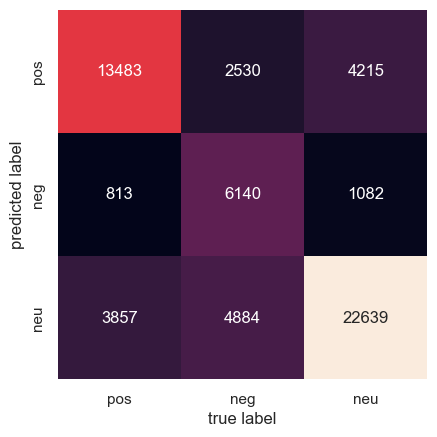

In [148]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
mat = confusion_matrix(y_test, res)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["pos","neg","neu"], yticklabels=["pos","neg","neu"])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [199]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
vectorized = count_vectorize.fit_transform(X_train["cleaned tweets"])
clf.fit(vectorized, y_train)
# joblib.dump(clf, 'BernoulliNB.joblib')

['BernoulliNB.joblib']

In [150]:
vectorized = count_vectorize.transform(X_test["cleaned tweets"])
res=clf.predict(vectorized)

In [151]:
res

array(['Neutral', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Negative'], dtype='<U8')

Text(110.44999999999997, 0.5, 'predicted label')

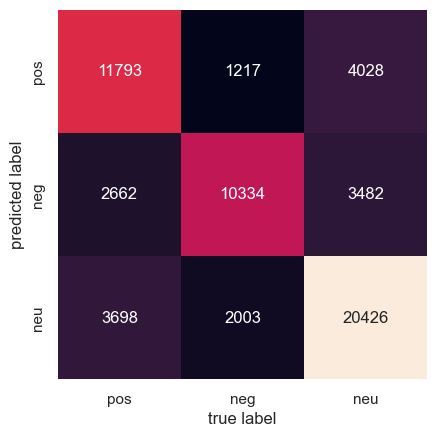

In [152]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
mat = confusion_matrix(y_test, res)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["pos","neg","neu"], yticklabels=["pos","neg","neu"])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [153]:
from sklearn import metrics
metrics.accuracy_score(res, y_test)

0.7134617641634391

In [260]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
vectorized = count_vectorize.fit_transform(X_train["cleaned tweets"])
logisticRegr.fit(vectorized, y_train)
# joblib.dump(logisticRegr, 'LogisticRegression.joblib')

c:\UserProgramFiles\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
vectorized = count_vectorize.transform(X_test["cleaned tweets"])
res=logisticRegr.predict(vectorized)
res

In [157]:
metrics.accuracy_score(res, y_test)

0.8951259996982043

Text(110.44999999999997, 0.5, 'predicted label')

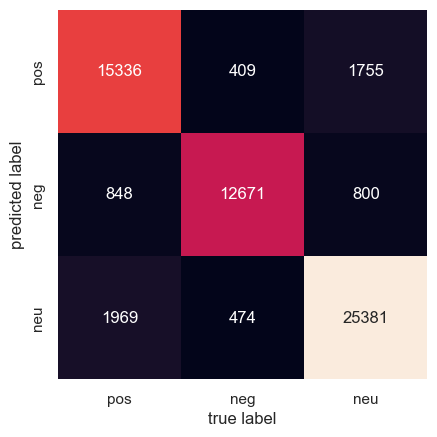

In [158]:
mat = confusion_matrix(y_test, res)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["pos","neg","neu"], yticklabels=["pos","neg","neu"])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
from sklearn.svm import LinearSVC
clf=LinearSVC()
vectorized = count_vectorize.fit_transform(X_train["cleaned tweets"])
clf.fit(vectorized, y_train)
joblib.dump(clf, 'LinearSVC.joblib')

In [ ]:
vectorized = count_vectorize.transform(X_test["cleaned tweets"])
res=clf.predict(vectorized)
res

In [161]:
metrics.accuracy_score(res, y_test)

0.9011116141039183

Text(110.44999999999997, 0.5, 'predicted label')

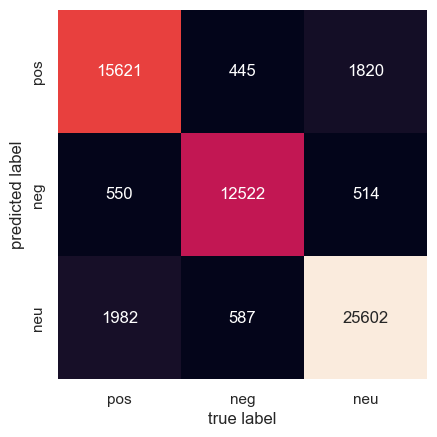

In [162]:
mat = confusion_matrix(y_test, res)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["pos","neg","neu"], yticklabels=["pos","neg","neu"])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [203]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
vectorized = count_vectorize.fit_transform(X_train["cleaned tweets"])
clf.fit(vectorized, y_train)
joblib.dump(clf, 'AdaBoostClassifier.joblib')

['AdaBoostClassifier.joblib']

In [164]:
vectorized = count_vectorize.transform(X_test["cleaned tweets"])
res=clf.predict(vectorized)

In [165]:
metrics.accuracy_score(res, y_test)

0.6926546283721476

Text(110.44999999999997, 0.5, 'predicted label')

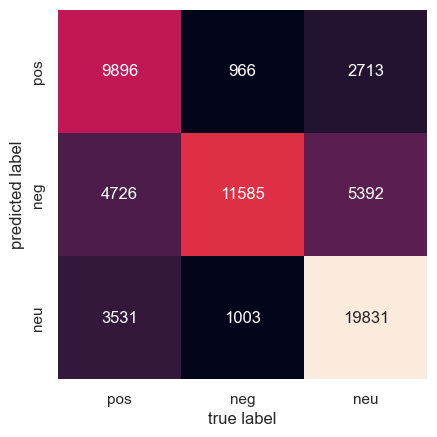

In [166]:
mat = confusion_matrix(y_test, res)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["pos","neg","neu"], yticklabels=["pos","neg","neu"])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [204]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier()
vectorized = count_vectorize.fit_transform(X_train["cleaned tweets"])
clf.fit(vectorized, y_train)
joblib.dump(clf, 'RidgeClassifier.joblib')

['RidgeClassifier.joblib']

In [168]:
vectorized = count_vectorize.transform(X_test["cleaned tweets"])
res=clf.predict(vectorized)


In [169]:
metrics.accuracy_score(res, y_test)

0.8320507016749661

Text(110.44999999999997, 0.5, 'predicted label')

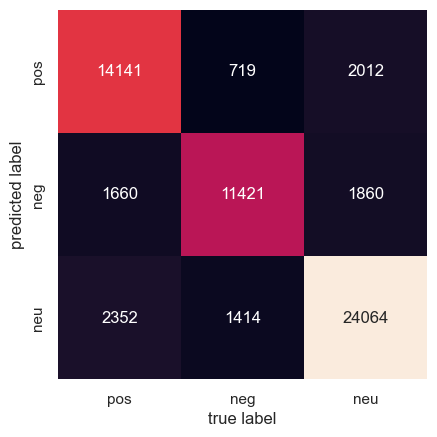

In [170]:
mat = confusion_matrix(y_test, res)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["pos","neg","neu"], yticklabels=["pos","neg","neu"])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [205]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf = PassiveAggressiveClassifier(random_state=0)
vectorized = count_vectorize.fit_transform(X_train["cleaned tweets"])
clf.fit(vectorized, y_train)
joblib.dump(clf, 'PassiveAggressiveClassifier.joblib')

['PassiveAggressiveClassifier.joblib']

In [172]:
vectorized = count_vectorize.transform(X_test["cleaned tweets"])
res=clf.predict(vectorized)


In [173]:
metrics.accuracy_score(res, y_test)

0.8682997166473853

Text(110.44999999999997, 0.5, 'predicted label')

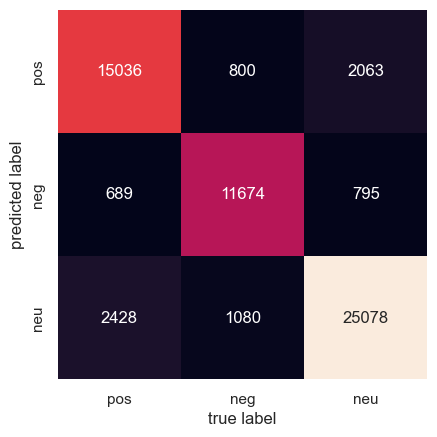

In [174]:
mat = confusion_matrix(y_test, res)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["pos","neg","neu"], yticklabels=["pos","neg","neu"])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [206]:
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0)
vectorized = count_vectorize.fit_transform(X_train["cleaned tweets"])
clf.fit(vectorized, y_train)
joblib.dump(clf, 'Perceptron.joblib')

['Perceptron.joblib']

In [176]:
vectorized = count_vectorize.transform(X_test["cleaned tweets"])
res=clf.predict(vectorized)


In [177]:
metrics.accuracy_score(res, y_test)

0.8717368341632714

Text(110.44999999999997, 0.5, 'predicted label')

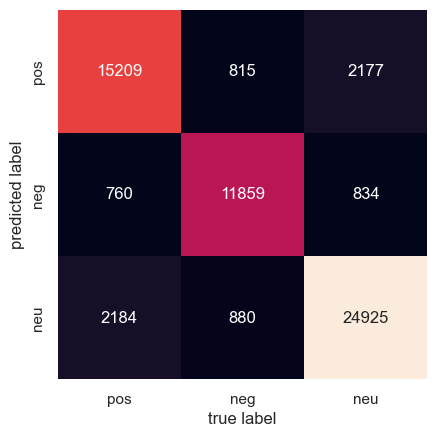

In [178]:
mat = confusion_matrix(y_test, res)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["pos","neg","neu"], yticklabels=["pos","neg","neu"])
plt.xlabel('true label')
plt.ylabel('predicted label')